In [102]:
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
import statistics
from types import *
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from scipy.stats import variation
import operator
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

## Reading in Acute Inflamations Data and Transforming Dataframe

In [65]:
df = pd.read_csv('../data/diagnosis.data', encoding='utf-16', sep='\s+', names=['Temp', 'Nausea', 'LumbarPain', 'Urine Pushing', 'Pains', 'Burning','Inflamation', 'Nephritis'])
df.head()
# Go through and change the temperate to using decimals instead of commas
for index, row in df.iterrows() :
    df.loc[index, 'Temp'] = row['Temp'].replace(",", ".")
    
df['Nausea'] = df['Nausea'].map({'yes' : 1, 'no' : 0})
df['LumbarPain'] = df['LumbarPain'].map({'yes' : 1, 'no' : 0})
df['Urine Pushing'] = df['Urine Pushing'].map({'yes' : 1, 'no' : 0})
df['Pains'] = df['Pains'].map({'yes' : 1, 'no' : 0})
df['Burning'] = df['Burning'].map({'yes' : 1, 'no' : 0})
df['Inflamation'] = df['Inflamation'].map({'yes' : 1, 'no' : 0})
df['Nephritis'] = df['Nephritis'].map({'yes' : 1, 'no' : 0})
df.head()

,Temp,Nausea,LumbarPain,Urine Pushing,Pains,Burning,Inflamation,Nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


## Creating Decision Tree

In [66]:
dTree = tree.DecisionTreeClassifier()
y = []
for index, row in df.iterrows() :
    y.append([row['Inflamation'], row['Nephritis']])
df.drop(['Inflamation', 'Nephritis'], axis=1)
dTree.fit(df, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
dot_data = tree.export_graphviz(dTree, out_file=None)
graph = graphviz.Source(dot_data)

## Reading in Crime Data

In [68]:
dfCrime = pd.read_csv('../data/communities.data', header=None)
dfCrime.head()
dropped = [0,1,2,3,4]
dfCrime.drop(dfCrime[dropped], axis=1, inplace=True)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
crimeCols = list(dfCrime)

# Changing the columns with strings to float
for col in crimeCols :

    # Check whether col contains strings
    # Find mean on whether it does or not
    if(isinstance(dfCrime[col][0], str)) :
        dfCrime[col] = pd.to_numeric(dfCrime[col], errors='coerce', downcast='float')
        
# Change nan to mean of each column
dfCrime = dfCrime.fillna(dfCrime.mean())
            
dfCrime.head()

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


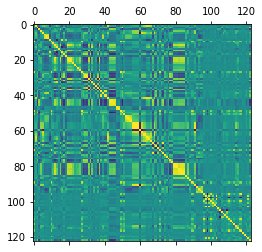

In [69]:
# Create and plot correlation matrix 
correlations = dfCrime.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
plt.show()

## Coefficient of Variation

In [70]:
cvDict = {}
crimeCols = list(dfCrime)
for col in crimeCols :
    mean = statistics.mean(dfCrime[col])
    sd = statistics.stdev(dfCrime[col])
    cv = sd/mean
    cvDict[col] = cv
    
# Get the top 11 attributes
top11 = dict(sorted(cvDict.items(), key=operator.itemgetter(1), reverse=True)[:11])
print(top11)

{95: 4.407702440864075, 94: 3.4854812687233783, 54: 2.994196449484331, 56: 2.900497163885278, 125: 2.555266002927166, 32: 2.3049697148522164, 5: 2.203502536390983, 15: 2.0017436381957645, 76: 1.958779729782095, 118: 1.6780314766044913, 10: 1.6142777917106848}


## Making Scatter Plots

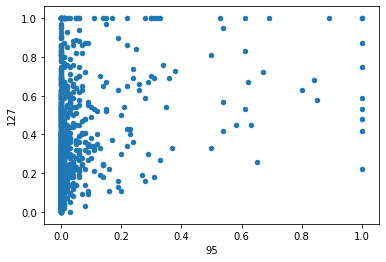

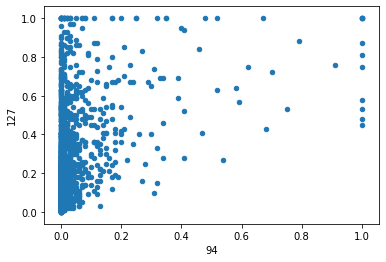

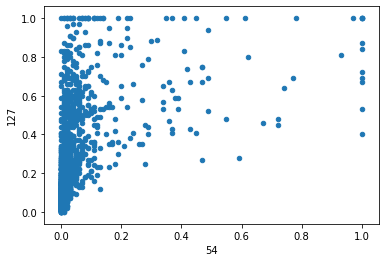

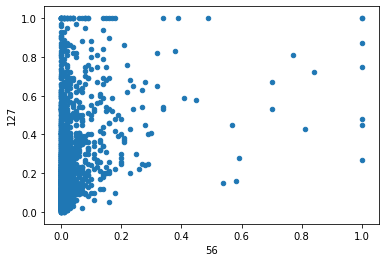

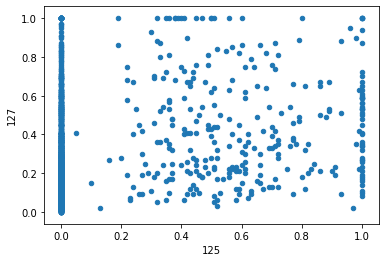

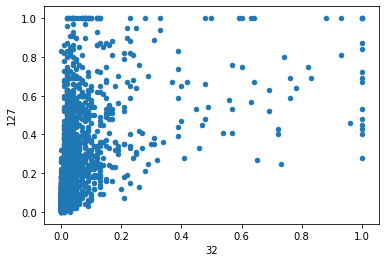

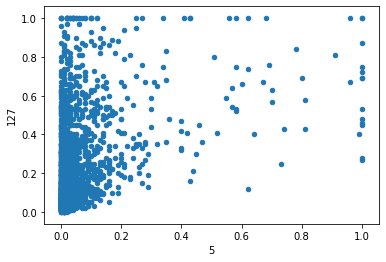

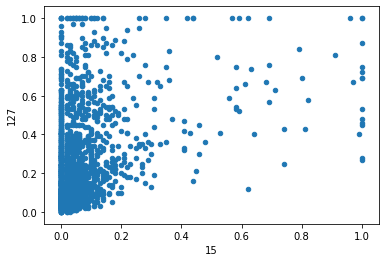

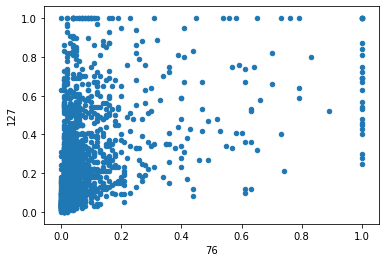

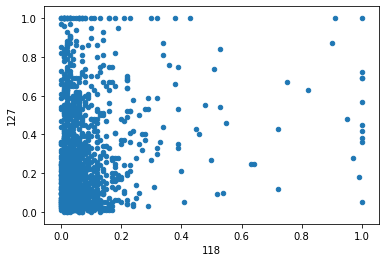

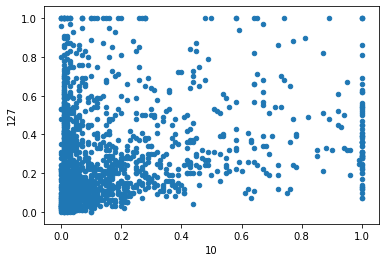

In [71]:
for key,val in top11.items() :
    dfCrime.plot.scatter(x=key, y=127)

## Making Box Plots

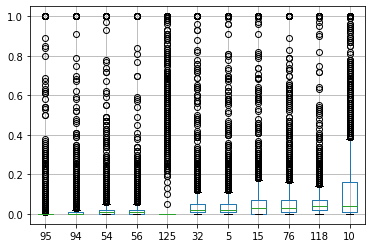

In [72]:
top11Keys = list(top11.keys())
boxplot = dfCrime.boxplot(column=top11Keys)

## Conclusions

## Linear Model

In [103]:
# Creating test and training set
trainingDf = dfCrime[:1495]
testDf = dfCrime[1495:]
print(trainingDf[127])
# For linear model
y_train = trainingDf.pop(127)
X_train = trainingDf;
y_true = testDf.pop(127)
X_test = testDf;

linReg = LinearRegression().fit(X_train, y_train)
y_pred = linReg.predict(X_test)

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1490    0.03
1491    0.20
1492    0.30
1493    0.03
1494    0.23
Name: 127, Length: 1495, dtype: float64


ValueError: continuous is not supported